# Diabetes Predictor

Author: Riley Rongere

Date: 05/10/2023

**Dataset**
- https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

# Objective

My objective is to create a machine learning model able to predict whether or not an individual has diabetes based on several health facotrs.

Further, I will be changing are the activation functions of the input and hidden layers of the models to determine the effects of each of them on the models performance.

The data being used for this experiment is the Diabetes prediction dataset provided by MOHAMMED MUSTAFA on Kaggle.

# Data Preparation

- drop smoking_history column due to ambiguous data (No time frame)
- drop rows with 'other' in gender column
- separate gender into two separate columns (male/female)
- convert true/false to 1/0
- train/test split
- normalize data

In [1]:
# load and prepare data

## Connect to Drive
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

# Import data
path = '/content/drive/MyDrive/CS167-Machine_Learning/datasets/diabetes_prediction_dataset.csv'
df = pd.read_csv(path)
df.head()

Mounted at /content/drive


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
# drop smoking_history due to ambiguous data (no time frame)
df.drop(['smoking_history'], axis = 1, inplace = True)

# check for nan data
print(df.isna().sum())

# check for unique values of gender and remove 'other' since it is only 18 of 100k
print(df.gender.unique())
print(df['gender'].value_counts())
df.drop(df[df['gender'] == 'Other'].index, inplace = True) # drops 18 rows


# separate gender into two columns
# df.gender.replace('MALE',0, inplace = True)
# df.gender.replace('FEMALE',1, inplace = True)

df['male'] = df['gender'] == 'Male'
df['female'] = df['gender'] == 'Female'
df.drop(['gender'], axis = 1, inplace = True)

# convert to numerical data
df = df*1

df.head()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
['Female' 'Male' 'Other']
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,male,female
0,80.0,0,1,25.19,6.6,140,0,0,1
1,54.0,0,0,27.32,6.6,80,0,0,1
2,28.0,0,0,27.32,5.7,158,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1
4,76.0,1,1,20.14,4.8,155,0,1,0


In [3]:
# Train test split
from sklearn.model_selection import train_test_split

data = df.drop(['diabetes'], axis=1)
sln = df['diabetes']

train_data, test_data, train_sln, test_sln = train_test_split(data, sln, test_size=0.2, stratify=sln, random_state=0)

In [4]:
# Normalize Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

# Research

Test the effectiveness of different activation functions.

In [5]:
# Initiate a sequential model with both the input and hidden layers having 'sigmoid' as the activation function.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model2 = Sequential()
model2.add(Dense(512, activation='sigmoid', input_dim=8))
model2.add(Dense(512, activation='sigmoid'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mae', metrics=['mae'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 267,777
Trainable params: 267,777
Non-trainable params: 0
_________________________________________________________________


In [6]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

hist2 = model2.fit(x, y, validation_split=0.2, epochs=50, batch_size=100)

Epoch 1/50
800/800 [==============================] - 16s 17ms/step - loss: 0.1822 - mae: 0.1822 - val_loss: 0.1409 - val_mae: 0.1409
Epoch 2/50
800/800 [==============================] - 8s 9ms/step - loss: 0.1306 - mae: 0.1306 - val_loss: 0.0913 - val_mae: 0.0913
Epoch 3/50
800/800 [==============================] - 9s 11ms/step - loss: 0.1216 - mae: 0.1216 - val_loss: 0.0968 - val_mae: 0.0968
Epoch 4/50
800/800 [==============================] - 7s 9ms/step - loss: 0.1161 - mae: 0.1161 - val_loss: 0.0924 - val_mae: 0.0924
Epoch 5/50
800/800 [==============================] - 9s 11ms/step - loss: 0.1074 - mae: 0.1074 - val_loss: 0.0883 - val_mae: 0.0883
Epoch 6/50
800/800 [==============================] - 7s 9ms/step - loss: 0.1068 - mae: 0.1068 - val_loss: 0.1019 - val_mae: 0.1019
Epoch 7/50
800/800 [==============================] - 9s 11ms/step - loss: 0.1030 - mae: 0.1030 - val_loss: 0.0893 - val_mae: 0.0893
Epoch 8/50
800/800 [==============================] - 7s 9ms/step - los

[]

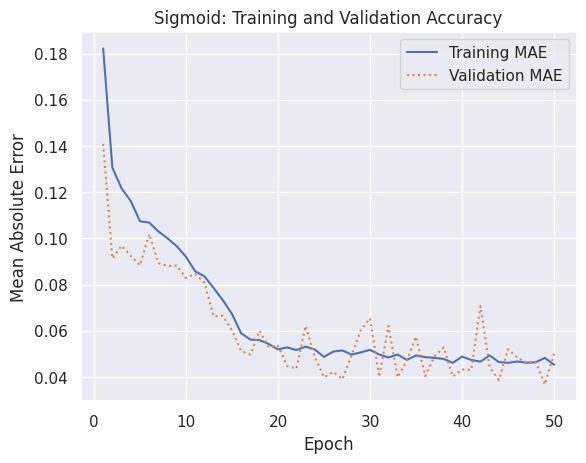

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist2.history['mae']
val_err = hist2.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Sigmoid: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [9]:
# Initiate a sequential model with both the input and hidden layers having 'tanh' as the activation function.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model3 = Sequential()
model3.add(Dense(512, activation='tanh', input_dim=8))
model3.add(Dense(512, activation='tanh'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mae', metrics=['mae'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               4608      
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 267,777
Trainable params: 267,777
Non-trainable params: 0
_________________________________________________________________


In [11]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

hist3 = model3.fit(x, y, validation_split=0.2, epochs=50, batch_size=100)

Epoch 1/50
800/800 [==============================] - 8s 9ms/step - loss: 0.1674 - mae: 0.1674 - val_loss: 0.0922 - val_mae: 0.0922
Epoch 2/50
800/800 [==============================] - 10s 13ms/step - loss: 0.1210 - mae: 0.1210 - val_loss: 0.1012 - val_mae: 0.1012
Epoch 3/50
800/800 [==============================] - 7s 9ms/step - loss: 0.1152 - mae: 0.1152 - val_loss: 0.1132 - val_mae: 0.1132
Epoch 4/50
800/800 [==============================] - 9s 11ms/step - loss: 0.1194 - mae: 0.1194 - val_loss: 0.1668 - val_mae: 0.1668
Epoch 5/50
800/800 [==============================] - 8s 10ms/step - loss: 0.1315 - mae: 0.1315 - val_loss: 0.1571 - val_mae: 0.1571
Epoch 6/50
800/800 [==============================] - 7s 9ms/step - loss: 0.1192 - mae: 0.1192 - val_loss: 0.1865 - val_mae: 0.1865
Epoch 7/50
800/800 [==============================] - 9s 11ms/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.1211 - val_mae: 0.1211
Epoch 8/50
800/800 [==============================] - 7s 8ms/step - los

[]

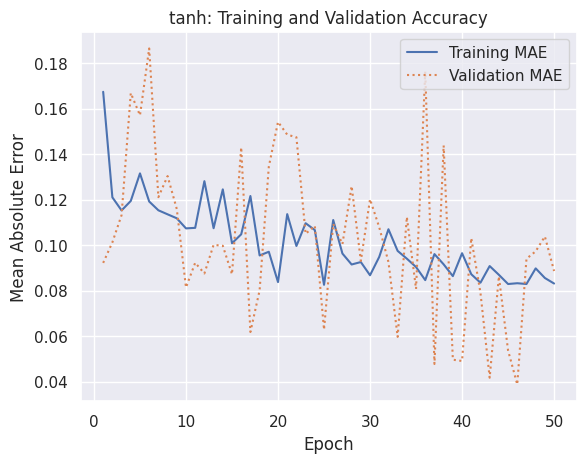

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist3.history['mae']
val_err = hist3.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('tanh: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [14]:
# Initiate a sequential model with both the input and hidden layers having 'sigmoid' as the activation function.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model4 = Sequential()
model4.add(Dense(512, activation='softmax', input_dim=8))
model4.add(Dense(512, activation='softmax'))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mae', metrics=['mae'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               4608      
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 267,777
Trainable params: 267,777
Non-trainable params: 0
_________________________________________________________________


In [15]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

hist4 = model4.fit(x, y, validation_split=0.2, epochs=50, batch_size=100)

Epoch 1/50
800/800 [==============================] - 13s 16ms/step - loss: 0.0855 - mae: 0.0855 - val_loss: 0.0839 - val_mae: 0.0839
Epoch 2/50
800/800 [==============================] - 8s 10ms/step - loss: 0.0855 - mae: 0.0855 - val_loss: 0.0840 - val_mae: 0.0840
Epoch 3/50
800/800 [==============================] - 8s 10ms/step - loss: 0.0854 - mae: 0.0854 - val_loss: 0.0838 - val_mae: 0.0838
Epoch 4/50
800/800 [==============================] - 10s 12ms/step - loss: 0.0853 - mae: 0.0853 - val_loss: 0.0839 - val_mae: 0.0839
Epoch 5/50
800/800 [==============================] - 10s 12ms/step - loss: 0.0851 - mae: 0.0851 - val_loss: 0.0833 - val_mae: 0.0833
Epoch 6/50
800/800 [==============================] - 11s 14ms/step - loss: 0.0846 - mae: 0.0846 - val_loss: 0.0828 - val_mae: 0.0828
Epoch 7/50
800/800 [==============================] - 10s 12ms/step - loss: 0.0838 - mae: 0.0838 - val_loss: 0.0813 - val_mae: 0.0813
Epoch 8/50
800/800 [==============================] - 9s 12ms/st

[]

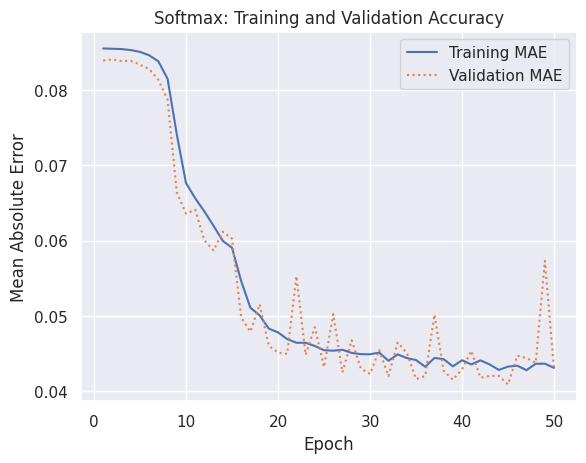

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist4.history['mae']
val_err = hist4.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Softmax: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Analysis

- Having 'softmax' as the activation function for both the input an hidden layer produced the best MSE with a score of about .045 after 50 epochs. This was a surprising result given that 'softmax' is geared towared multiclass classification while both 'sigmoid' and 'tanh' are geared toward binary classification which would fit this current dataset better.
- It's also worth noting that 'softmax' had a starting MSE of about .09 compared to 'sigmoid' and 'tanh' which began at about .18.
- Having 'tanh' as the activation function for both the input an hidden layer produced the worst MSE with a score of about .09 after 50 epochs. The reason for this may be due to the range 'tanh' being -1 to 1 compared to 'sigmoid' and 'softmax' which have a range of 0 to 1.
- Having 'sigmoid' as the activation function for both the input an hidden layer produced an MSE of about .05, which was slighlty worse than 'softmax'.
- The range of both 'sigmoid' and 'softmax' are 0 to 1 compared to 'tanh' witha a ranch of -1 to 1, which may help to explain the performance difference between the two groups.

# Bumps in the Road

- I had spent some time attempting to covert the smoking history column into numerical data but ultimatly abandon the column since I wasn't able to come up with a meaningful way to convert and use the data.
- Another issue I had was whether or not to include other activation functions (relu, and linear) for comparison sake. Unfortunatly I overlooked the fact that they were both regression metrics and when the MSE was calculated it was a very minisclule value due to the range of possible values for the predicted column only being 0-1. I ended up cutting these models due to their nature being different to the other models.